In [2]:
 %pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('applications.csv')
df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3


In [8]:
applicant_id_count = df['applicant_id'].count()
print("Count of unique 'applicant_id' values:", applicant_id_count)

Count of unique 'applicant_id' values: 13315


In [ ]:
#Removed duplicates for the 'applicant_id' field

In [8]:
df.drop_duplicates(subset='applicant_id', inplace=True)
applicant_id_count = df['applicant_id'].count()
print("Count of unique 'applicant_id' values:", applicant_id_count)

Count of unique 'applicant_id' values: 13278


In [ ]:
#Filled the missing values ​​with zeros in the 'External Rating' field
#In the 'Education level' field, filled in the missing values ​​with the text "Secondary"

In [10]:
df['External Rating'].fillna(0, inplace=True)
df['Education level'].fillna('Середня', inplace=True)

In [ ]:
#Saved cleaned version of data set as applications_cleaned.csv

In [13]:
df.to_csv('applications_cleaned.csv', index=False)

In [10]:
industries_df = pd.read_csv('industries.csv')
industries_df.head(10)

,Industry,Score
0,Blockchain,0
1,Public services / Government,20
2,Adtech / Advertising,10
3,Telecom,15
4,Automotive,15
5,E-commerce,15
6,Media,5
7,Інша,10
8,Dating,5
9,Edtech / Education,15


In [ ]:
#Merged DataFrames by field 'Industry'

In [11]:
df = pd.read_csv('applications.csv')
industries_df = pd.read_csv('industries.csv')
merged_df = df.merge(industries_df, on='Industry', how='left')

In [ ]:
#Converted 'Applied at' column to datetime format and created a new column Day of Week

In [21]:
merged_df['Applied at'] = pd.to_datetime(merged_df['Applied at'])
merged_df['Day of Week'] = merged_df['Applied at'].dt.dayofweek
merged_df['Day of Week'] = merged_df['Applied at'].dt.day_name()
merged_df.head(6)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Day of Week,Total Rating
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday,40
1,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,Wednesday,0
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,Wednesday,40
3,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,Wednesday,0
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,Wednesday,35
5,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,Wednesday,65


In [ ]:
#Calculated the rating of the application according to the following conditions:
#The rating is the sum of scores for a loan application based on 6 criteria.

In [33]:
def calculate_rating(row):
    rating = 0
    #The rating equals zero if the 'Amount' value is missing or if 'External Rating' equals zero.
    if pd.isna(row['Amount']) or row['External Rating'] == 0:
        return rating
        
    #If the applicant's age is between 35 and 55, 20 points are added to the rating.  
    if 35 <= row['Age'] <= 55:
        rating += 20

    #If the application was submitted on a non-weekend day, 20 points are added to the rating.
    if row['Day of Week'] not in ['Saturday', 'Sunday']:
        rating += 20

    #If the applicant is married, 20 points are added to the rating.
    if row['Marital status'] == 'Married':
        rating += 20

    #If the applicant is located in Kyiv or the region, 10 points are added to the rating.
    if row['Location'] == 'Київ чи область':
        rating += 10

    #The 'Score' value from the 'industries.csv' table is also added to the application (ranging from 0 to 20 points).
    rating += row['Score']

    #If the 'External Rating' is greater than or equal to 7, 20 points are added to the rating.
    if row['External Rating'] >= 7:
        rating += 20
    #If the 'External Rating' is less than or equal to 2, 20 points are subtracted from the rating.#
    elif row['External Rating'] <= 2:
        rating -= 20
    #The rating should be a number from 0 to 100.
    rating = max(0, min(100, rating))

    return rating

merged_df['Total Rating'] = merged_df.apply(calculate_rating, axis=1)
merged_df.head(10)



,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Day of Week,Total Rating
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday,40
1,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,Wednesday,0
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,Wednesday,40
3,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,Wednesday,0
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,Wednesday,35
5,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,Wednesday,65
6,2022-11-30 10:27:42,4200.0,30,Чоловік,Media,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,0aaf59fb3ef90f50ccd4800312e5c271,5,Wednesday,35
7,2022-11-30 10:27:44,3600.0,24,Чоловік,E-commerce,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,aa54d6e672e4233febadbafdfd048327,15,Wednesday,35
8,2022-11-30 10:28:00,1950.0,27,Чоловік,Automotive,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,2eed2883cd1673b21b2ce89d1115c245,15,Wednesday,35
9,2022-11-30 10:28:00,NaN,17,Чоловік,Інша,Married,2.0,Ще студент вишу,NaN,9c7a640dccb37d9f2164bac1deb0edfa,10,Wednesday,0


In [ ]:
#In the resulting table, only applications with a rating greater than zero are retained, and these applications are considered accepted

In [31]:
filtered_df = merged_df[merged_df['Total Rating'] > 0]
filtered_df.head(10)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Day of Week,Total Rating
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday,40
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,Wednesday,40
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,Wednesday,35
5,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,Wednesday,65
6,2022-11-30 10:27:42,4200.0,30,Чоловік,Media,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,0aaf59fb3ef90f50ccd4800312e5c271,5,Wednesday,35
7,2022-11-30 10:27:44,3600.0,24,Чоловік,E-commerce,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,aa54d6e672e4233febadbafdfd048327,15,Wednesday,35
8,2022-11-30 10:28:00,1950.0,27,Чоловік,Automotive,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,2eed2883cd1673b21b2ce89d1115c245,15,Wednesday,35
10,2022-11-30 10:28:03,18000.0,25,Чоловік,Dating,Single,5.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,f8138219d5a95649cc85bdabeb3732ca,5,Wednesday,25
12,2022-11-30 10:28:27,2550.0,20,Чоловік,Legal,Married,1.0,Ще студент вишу,Івано-Франківськ чи область,0c792f52f2bf30cdfee53b24b912678a,20,Wednesday,40
13,2022-11-30 10:28:28,18000.0,33,Чоловік,Big Data,Single,10.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,28165b1a85ee2e48782cada5f2a660b4,20,Wednesday,70


In [ ]:
#Group the data from the resulting table by application submission weekday and plot the average rating of accepted applications for each weekday on a graph.

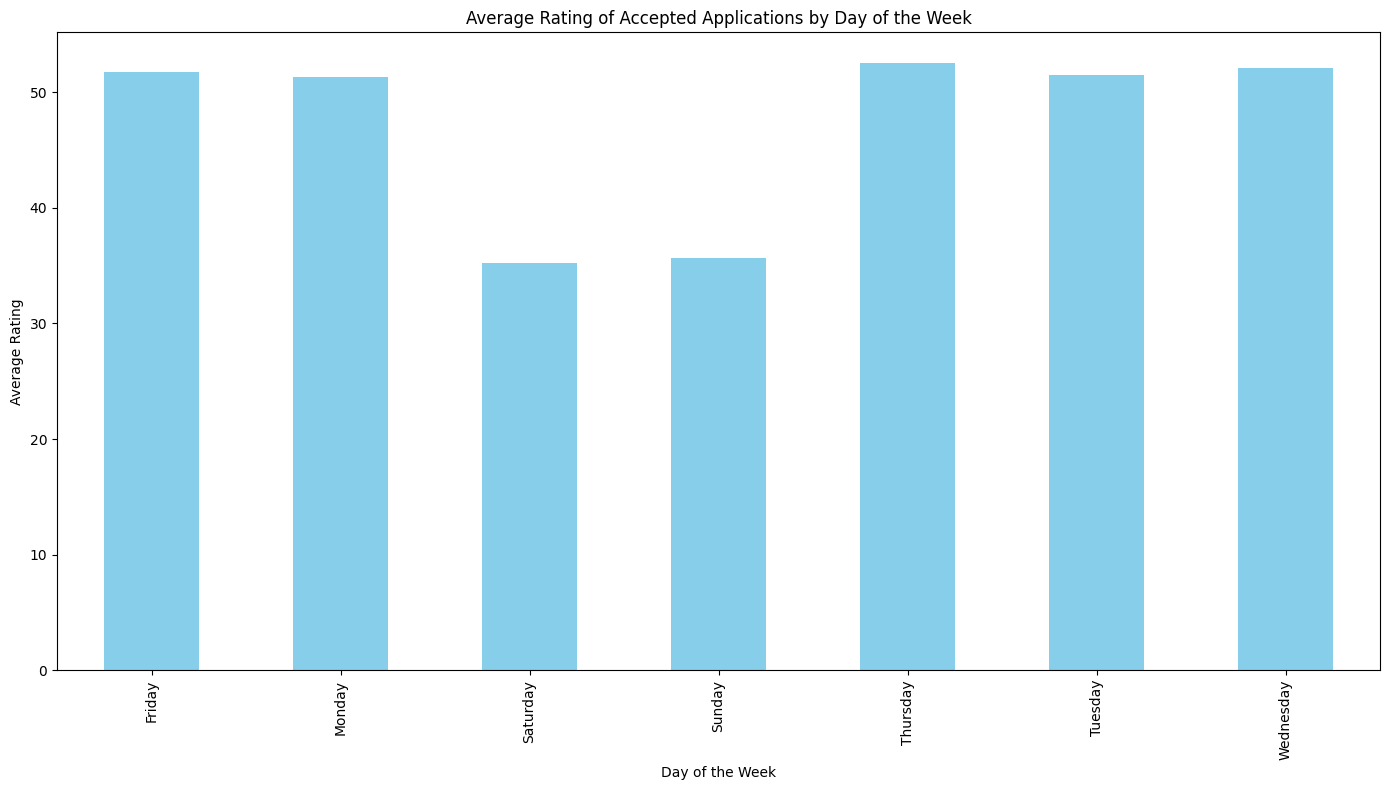

In [40]:
grouped = filtered_df.groupby(filtered_df['Applied at'].dt.strftime('%A'))['Total Rating'].mean()

plt.figure(figsize=(14, 8))


grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rating')
plt.title('Average Rating of Accepted Applications by Day of the Week')

plt.tight_layout()
plt.show()